In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customer_Dataset.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

features = ['Age','Annual Income (k$)','Spending Score (1-100)','Gender']
X=df[features]

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca =pca.fit_transform(X_scaled)

df["PCA1"] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

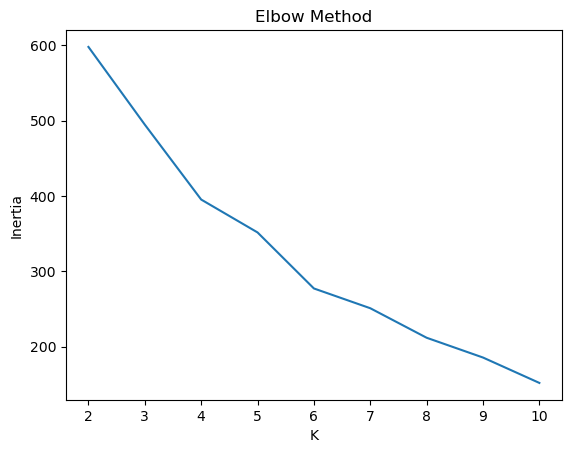

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia =[]
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2,11), inertia)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [10]:
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f'K={k},Silhouette Score={score:.2f}')

optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k , random_state=42)
labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = labels

K=2,Silhouette Score=0.28
K=3,Silhouette Score=0.26
K=4,Silhouette Score=0.29
K=5,Silhouette Score=0.27
K=6,Silhouette Score=0.33
K=7,Silhouette Score=0.35
K=8,Silhouette Score=0.37
K=9,Silhouette Score=0.39
K=10,Silhouette Score=0.42


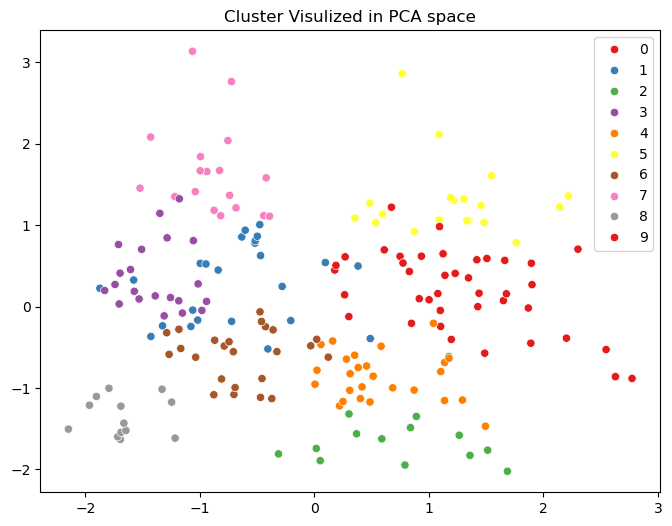

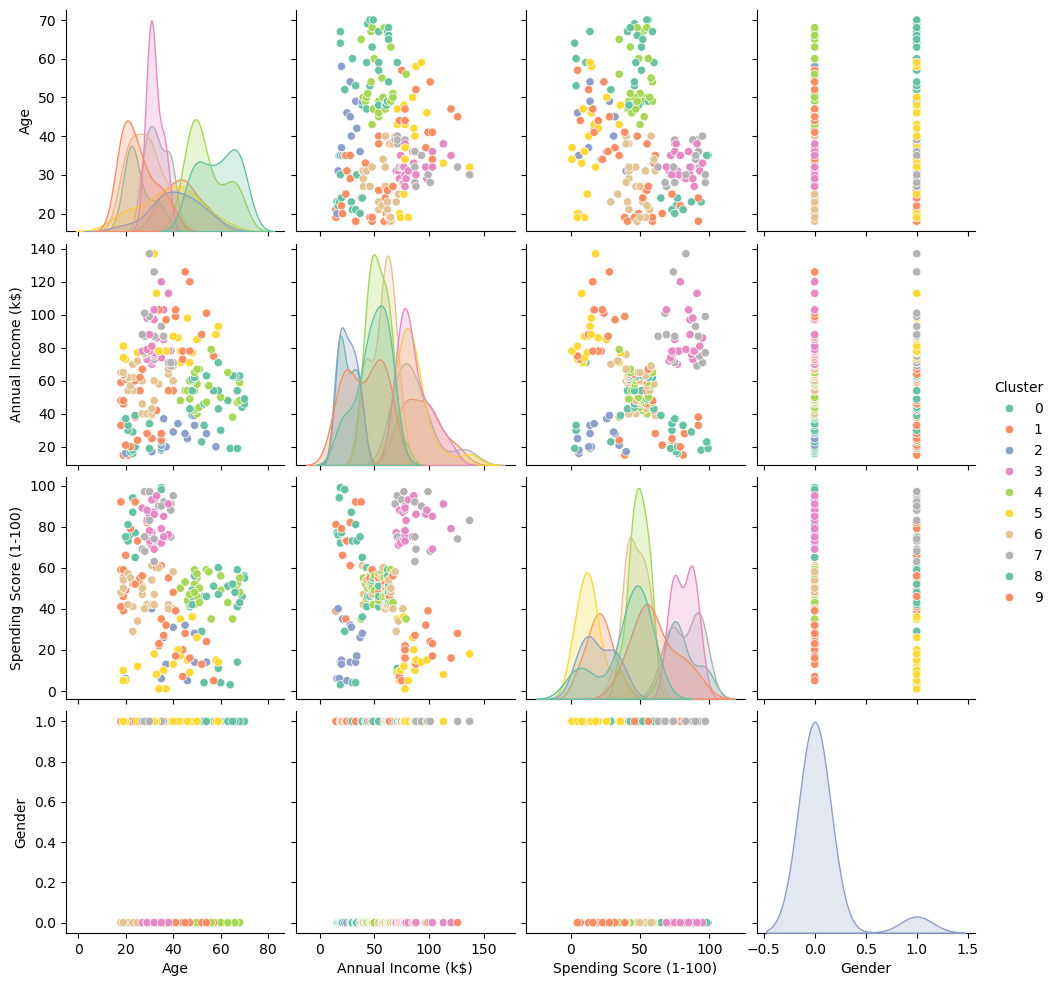

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         71.653846  1.000000  58.846154           48.692308   
1         56.083333  1.000000  25.250000           41.250000   
2         22.857143  0.071429  41.214286           26.071429   
3        163.333333  0.000000  32.190476           86.047619   
4         83.923077  0.000000  54.153846           54.230769   
5        161.105263  1.000000  38.473684           85.894737   
6         92.400000  0.000000  27.960000           57.360000   
7        160.444444  1.000000  33.277778           87.111111   
8         22.769231  0.000000  25.461538           25.692308   
9        171.714286  0.000000  43.785714           93.285714   

         Spending Score (1-100)      PCA1      PCA2  
Cluster                                              
0                     39.846154  1.530369  0.170290  
1                     60.916667 -0.688383  0.287336  
2              

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue = labels, palette='Set1')
plt.title('Cluster Visulized in PCA space')
plt.show()

sns.pairplot(df[features+['Cluster']], hue = 'Cluster', palette='Set2')
plt.show()

cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

In [12]:
for i in range(10):
    print(f"Cluster {i} description:")
    print(df[df['Cluster'] == i].describe())

Cluster 0 description:
       CustomerID  Gender        Age  Annual Income (k$)  \
count   26.000000    26.0  26.000000           26.000000   
mean    71.653846     1.0  58.846154           48.692308   
std     33.547509     0.0   8.048316           14.529334   
min      9.000000     1.0  47.000000           19.000000   
25%     54.500000     1.0  52.250000           43.000000   
50%     73.000000     1.0  59.000000           51.500000   
75%    102.000000     1.0  66.750000           61.750000   
max    129.000000     1.0  70.000000           71.000000   

       Spending Score (1-100)       PCA1       PCA2  Cluster  
count               26.000000  26.000000  26.000000     26.0  
mean                39.846154   1.530369   0.170290      0.0  
std                 17.721608   0.599941   0.473767      0.0  
min                  3.000000   0.610412  -0.882988      0.0  
25%                 37.250000   1.083637   0.005090      0.0  
50%                 46.000000   1.462871   0.216559      0

In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),PCA1,PCA2,Cluster
0,1,1,19,15,39,-0.406383,-0.520714,1
1,2,1,21,15,81,-1.427673,-0.367310,1
2,3,0,20,16,6,0.050761,-1.894068,2
3,4,0,23,16,77,-1.694513,-1.631908,8
4,5,0,31,17,40,-0.313108,-1.810483,2


2025-10-04 16:27:54.226 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 16:27:54.302 
  command:

    streamlit run /opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-10-04 16:27:54.302 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 16:27:54.303 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 16:27:54.317 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 16:27:54.406 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 16:27:54.406 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 16:27:54.406 Thread 'MainThread': m

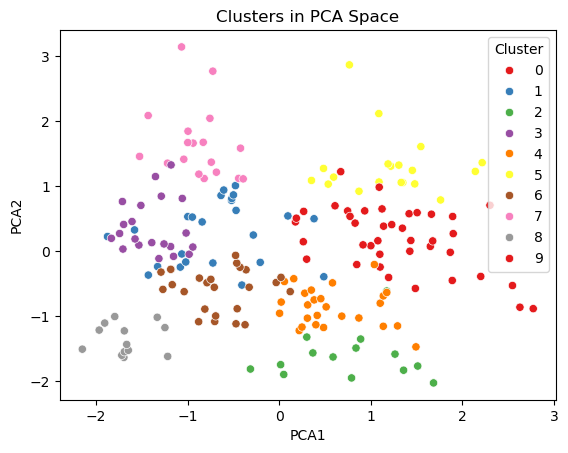

In [14]:
import streamlit as st

if "PCA1" in df.columns and 'PCA2' in df.columns:
    st.subheader('Cluster Verification(PCA)')
    fig, ax = plt.subplots()
    sns.scatterplot(data = df, x='PCA1', y='PCA2', hue ='Cluster', palette ='Set1', ax=ax)
    ax.set_title('Clusters in PCA Space')
    st.pyplot(fig)
else: 
    st.info("PCA columns not found. You can add them from visualization.")